### python3のバージョンを確認

In [676]:
!which python3

64011.19s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


/bin/python3


#### vestaでPOSCARを可視化

In [60]:
# import subprocess
# VESTA = '/home/morii-k/vesta/VESTA-gtk3/VESTA'
# POSCAR = './POSCAR'
# myprocess = subprocess.Popen([VESTA, '-open', POSCAR])

### ASEでPOSCARファイルを可視化

In [677]:
from ase.io import read, write
# POSCARファイルの読み込み
atoms = read("POSCAR")

# POSCARファイルの描画
from ase.visualize import view, ngl
ngl.view_ngl(atoms)

### matplotlibでposcarファイルを描画

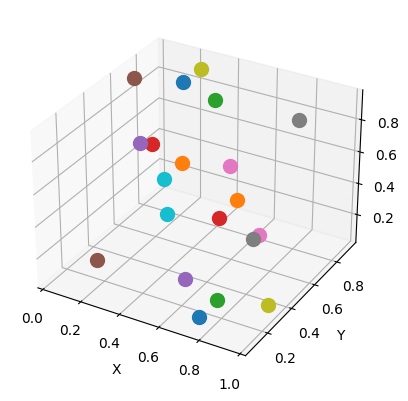

In [678]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# POSCARファイルから座標を読み込む関数
def read_poscar(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # 座標データの始まりの行を見つける
    for i, line in enumerate(lines):
        if "Direct" in line or "Cartesian" in line:
            start_line = i + 1
            break

    # 座標データを取得
    coordinates = []
    for line in lines[start_line:]:
        coords = [float(coord) for coord in line.split()]
        coordinates.append(coords)

    return coordinates

# POSCARファイルのパス
poscar_file = 'POSCAR'

# 座標を読み込む
coordinates = read_poscar(poscar_file)

# 3Dプロット
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 原子の座標をプロット
for coord in coordinates:
    x, y, z = coord
    ax.scatter(x, y, z, marker='o', s=100)

# グラフの設定
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# グラフを表示
plt.show()


### POSCARファイルを.csvファイルに変換

In [88]:
import numpy as np
import pandas as pd

# POSCARファイルの読み込み
def read_POSCAR(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    # 構造情報が始まる行を特定
    for i, line in enumerate(lines):
        if 'Direct' in line or 'Cartesian' in line:
            start_line = i + 1
            break

    # 原子座標データを取得
    atom_data = []
    for line in lines[start_line:]:
        if line.strip() == '':
            break
        atom_data.append(line.strip().split())

    return atom_data

# CSVファイルに書き出し
def save_to_csv(data, output_filename):
    df = pd.DataFrame(data, columns=['x', 'y', 'z'])
    df.to_csv(output_filename, index=False)

if __name__ == "__main__":
    poscar_file = "POSCAR"  # 自分のPOSACRファイルのパスを指定してください
    output_csv_file = "structure.csv"  # CSVファイルの出力先を指定してください

    atom_data = read_POSCAR(poscar_file)
    save_to_csv(atom_data, output_csv_file)


### POSCARファイルをDataFrame形式に変換

In [945]:
import pandas as pd

# POSCARファイルの読み込み
def read_POSCAR(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    # POSCARファイルの各行をリストに格納
    poscar_data = [line.strip() for line in lines]

    return poscar_data

# POSCARデータをDataFrameに変換
def poscar_to_dataframe(poscar_data):
    # 構造情報が始まる行を特定
    for i, line in enumerate(poscar_data):
        if 'Direct' in line or 'Cartesian' in line:
            start_line = i + 1
            break

    # 原子座標データを取得
    atom_data = poscar_data[start_line:]
    df = pd.DataFrame([line.split() for line in atom_data], columns=['x', 'y', 'z'])

    return df

if __name__ == "__main__":
    poscar_file = "POSCAR"  # 自分のPOSACRファイルのパスを指定してください

    poscar_data = read_POSCAR(poscar_file)
    dataframe = poscar_to_dataframe(poscar_data)

    # DataFrameを編集、処理、保存などを行うことができます
    # 例: データの表示
    print(dataframe)

    # 例: DataFrameをCSVファイルに保存
    dataframe.to_csv("edited_structure.csv", index=False)


                    x                  y                  z
0   0.250000000000000  0.757000000000000  0.919000000000000
1   0.250000000000000  0.743000000000000  0.419000000000000
2   0.750000000000000  0.243000000000000  0.081000000000000
3   0.750000000000000  0.257000000000000  0.581000000000000
4   0.250000000000000  0.416310000000000  0.754900000000000
5   0.250000000000000  0.083690000000000  0.254900000000000
6   0.750000000000000  0.583690000000000  0.245100000000000
7   0.750000000000000  0.916310000000000  0.745100000000000
8   0.250000000000000  0.901100000000000  0.912200000000000
9   0.250000000000000  0.598900000000000  0.412200000000000
10  0.750000000000000  0.098900000000000  0.087800000000000
11  0.750000000000000  0.401100000000000  0.587800000000000
12  0.459500000000000  0.683900000000000  0.921000000000000
13  0.040500000000000  0.816100000000000  0.421000000000000
14  0.540500000000000  0.316100000000000  0.079000000000000
15  0.040500000000000  0.683900000000000

### poscarファイルから元素種とその数を抽出し、PandasのSeriesとして出力する

In [946]:
import pandas as pd

# POSCARファイルを読み込む
with open('POSCAR', 'r') as file:
    poscar_data = file.readlines()

# 原子種とその数を含む行を抽出
element_species = poscar_data[5].split()
element_count = [int(s) for s in poscar_data[6].split()]

# # 原子種のリストと対応する数のリストを抽出
species_list = [elem for elem, count in zip(element_species, element_count) for _ in range(count)]

# # 原子種とその数からPandasのSeriesを作成
df_species = pd.DataFrame(species_list, columns=['Species'])

# # Seriesを表示
print(df_species)


   Species
0        C
1        C
2        C
3        C
4       Ba
5       Ba
6       Ba
7       Ba
8        O
9        O
10       O
11       O
12       O
13       O
14       O
15       O
16       O
17       O
18       O
19       O


In [947]:
df_coords = pd.merge(dataframe, df_species, left_index=True, right_index=True)
df_coords

,x,y,z,Species
0,0.250000000000000,0.757000000000000,0.919000000000000,C
1,0.250000000000000,0.743000000000000,0.419000000000000,C
2,0.750000000000000,0.243000000000000,0.081000000000000,C
3,0.750000000000000,0.257000000000000,0.581000000000000,C
4,0.250000000000000,0.416310000000000,0.754900000000000,Ba
5,0.250000000000000,0.083690000000000,0.254900000000000,Ba
6,0.750000000000000,0.583690000000000,0.245100000000000,Ba
7,0.750000000000000,0.916310000000000,0.745100000000000,Ba
8,0.250000000000000,0.901100000000000,0.912200000000000,O
9,0.250000000000000,0.598900000000000,0.412200000000000,O


#### df_coordsにnnlistと同じ原子を特定するidとしてcentral atomカラムを追加

In [948]:
# pd.Series([i for i in range(1, len(df_coords) + 1)])

In [949]:
df_poscar_central = pd.DataFrame([i for i in range(1, len(df_coords) + 1)], columns=['central atom'])
df_poscar_central

,central atom
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [950]:
df_coords = pd.merge(df_poscar_central, df_coords, left_index=True, right_index=True)


In [951]:
df_coords

,central atom,x,y,z,Species
0,1,0.250000000000000,0.757000000000000,0.919000000000000,C
1,2,0.250000000000000,0.743000000000000,0.419000000000000,C
2,3,0.750000000000000,0.243000000000000,0.081000000000000,C
3,4,0.750000000000000,0.257000000000000,0.581000000000000,C
4,5,0.250000000000000,0.416310000000000,0.754900000000000,Ba
5,6,0.250000000000000,0.083690000000000,0.254900000000000,Ba
6,7,0.750000000000000,0.583690000000000,0.245100000000000,Ba
7,8,0.750000000000000,0.916310000000000,0.745100000000000,Ba
8,9,0.250000000000000,0.901100000000000,0.912200000000000,O
9,10,0.250000000000000,0.598900000000000,0.412200000000000,O


In [637]:
species_list

['C',
 'C',
 'C',
 'C',
 'Ba',
 'Ba',
 'Ba',
 'Ba',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O']

In [638]:
counts = [4, 4, 12]
elements = ['C', 'Ba', 'O']

result = [elem for elem, count in zip(elements, counts) for _ in range(count)]

print(result)


['C', 'C', 'C', 'C', 'Ba', 'Ba', 'Ba', 'Ba', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [640]:
import pandas as pd

# POSCARファイルの読み込み
def read_POSCAR(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    # POSCARファイルの各行をリストに格納
    poscar_data = [line.strip() for line in lines]

    return poscar_data

# POSCARデータをDataFrameに変換
def poscar_to_dataframe(poscar_data):
    # 元素種を取得
    element_symbols = poscar_data[5].split()

    # 構造情報が始まる行を特定
    for i, line in enumerate(poscar_data):
        if 'Direct' in line or 'Cartesian' in line:
            start_line = i + 1
            break

    # 原子座標データを取得
    atom_data = poscar_data[start_line:]
    data = []

    for line in atom_data:
        elements = line.split()
        x, y, z = map(float, elements[:3])
        data.append([element_symbols[elements[3]], x, y, z])

    df = pd.DataFrame(data, columns=['Element', 'x', 'y', 'z'])

    return df

if __name__ == "__main__":
    poscar_file = "POSCAR"  # 自分のPOSACRファイルのパスを指定してください

    poscar_data = read_POSCAR(poscar_file)
    # dataframe = poscar_to_dataframe(poscar_data)

    # DataFrameを編集、処理、保存などを行うことができます
    # 例: データの表示
    # print(dataframe)

    # 例: DataFrameをCSVファイルに保存
    # dataframe.to_csv("edited_structure.csv", index=False)


In [860]:
# 元素種を取得
element_symbols = poscar_data[5].split()

# 構造情報が始まる行を特定
for i, line in enumerate(poscar_data):
    if 'Direct' in line or 'Cartesian' in line:
        start_line = i + 1
        break

# # 原子座標データを取得
atom_data = poscar_data[start_line:]
data = []

for line in atom_data:
    elements = line.split()
    x, y, z = map(float, elements[:3])
    data.append([element_symbols[elements[3]], x, y, z])

# df = pd.DataFrame(data, columns=['Element', 'x', 'y', 'z'])



IndexError: list index out of range

In [783]:
element_symbols

['C', 'Ba', 'O']

In [784]:
elements

['0.250000000000000', '0.757000000000000', '0.919000000000000']

In [785]:
elements[3]

IndexError: list index out of range

In [786]:
element_symbols[elements[3]]

IndexError: list index out of range

In [647]:
poscar_data[5]

'C  Ba   O'

In [648]:
pd.DataFrame(poscar_data).iloc


### POSCARファイルをテキストファイルとして読み込み

In [649]:
POSCAR = 'POSCAR'
with open(POSCAR, mode="r") as f:
    print(f.read())

Generated by cif2cell 2.1.0. Ba C O3 :  de Villiers, J. P. R., American Mineralogist 56, 758-767 (1971).
   5.312600
  1.000000000000000   0.000000000000000   0.000000000000000
  0.000000000000000   1.674472009938636   0.000000000000000
  0.000000000000000   0.000000000000000   1.210028987689644
   C  Ba   O
   4   4  12
Direct
  0.250000000000000   0.757000000000000   0.919000000000000 
  0.250000000000000   0.743000000000000   0.419000000000000 
  0.750000000000000   0.243000000000000   0.081000000000000 
  0.750000000000000   0.257000000000000   0.581000000000000 
  0.250000000000000   0.416310000000000   0.754900000000000 
  0.250000000000000   0.083690000000000   0.254900000000000 
  0.750000000000000   0.583690000000000   0.245100000000000 
  0.750000000000000   0.916310000000000   0.745100000000000 
  0.250000000000000   0.901100000000000   0.912200000000000 
  0.250000000000000   0.598900000000000   0.412200000000000 
  0.750000000000000   0.098900000000000   0.087800000000000 

### POSCAR.nnlistファイルをテキストファイルとして読み込み

In [650]:
POSCAR_nnlist = 'POSCAR.nnlist'
with open(POSCAR_nnlist) as f:
    print(f.read())

      1     1    0.000000    0.000000   0.000000   0.000000    0   0   0  C C
      1     9    1.282630    0.000000   1.281885  -0.043713    0   0   0  C O
      1    13    1.289100    1.112990  -0.650283   0.012857    0   0   0  C O
      1    16    1.289100   -1.112990  -0.650283   0.012857    0   0   0  C O
      2     2    0.000000    0.000000   0.000000   0.000000    0   0   0  C C
      2    10    1.282630    0.000000  -1.281885  -0.043713    0   0   0  C O
      2    14    1.289100   -1.112990   0.650283   0.012857    0   0   0  C O
      2    17    1.289100    1.112990   0.650283   0.012857    0   0   0  C O
      3     3    0.000000    0.000000   0.000000   0.000000    0   0   0  C C
      3    11    1.282630    0.000000  -1.281885   0.043713    0   0   0  C O
      3    15    1.289100   -1.112990   0.650283  -0.012857    0   0   0  C O
      3    19    1.289100    1.112990   0.650283  -0.012857    0   0   0  C O
      4     4    0.000000    0.000000   0.000000   0.000000    0

### POSCAR.nnlistファイルを.csvファイルに変換する関数：nnlist2csv

In [795]:
def nnlist2csv(POSCAR_nnlist='POSCAR.nnlist'):
    # テキストファイルの内容を読み込みます
    with open(POSCAR_nnlist, 'r') as input_file:
        lines = input_file.readlines()

    # CSVファイルに書き込むためのファイルを開きます
    output_csv_fname = POSCAR_nnlist + '.csv'
    with open(output_csv_fname, 'w') as output_file:
        # CSVヘッダを書き込みます
        output_file.write("central atom,neighboring atom,distance,X,Y,Z,unitcell_x,unitcell_y,unitcell_z,central species,neighboring species\n")
        
        # テキストファイルの各行を処理します
        for line in lines:
            # スペースで区切られた各要素を取得します
            elements = line.split()
            
            # CSV行を構築します
            csv_line = ','.join(elements[:11]) + '\n'
            
            # CSVファイルに書き込みます
            output_file.write(csv_line)


In [836]:
# nnlist2csvのテスト

# POSCAR.nnlistのファイルパスを指定
POSCAR_nnlist = 'POSCAR.nnlist'

nnlist2csv(POSCAR_nnlist)


### POSCAR.nnlist.csvをDataFrameとして読み込む関数：csv2dataframe

In [837]:
import pandas as pd

def csv2dataframe(nnlist_csv_file='POSCAR.nnlist.csv'):
    df_nnlist = pd.read_csv(nnlist_csv_file)
    return df_nnlist

In [838]:
# csv2dataframeのテストコード
nnlist_csv_file = 'POSCAR.nnlist.csv'

df_nnlist = csv2dataframe(nnlist_csv_file)

In [800]:
df_nnlist

,central atom,neighboring atom,distance,X,Y,Z,unitcell_x,unitcell_y,unitcell_z,central species,neighboring species
0,1,1,0.000000,0.000000,0.000000,0.000000,0,0,0,C,C
1,1,9,1.282630,0.000000,1.281885,-0.043713,0,0,0,C,O
2,1,13,1.289100,1.112990,-0.650283,0.012857,0,0,0,C,O
3,1,16,1.289100,-1.112990,-0.650283,0.012857,0,0,0,C,O
4,2,2,0.000000,0.000000,0.000000,0.000000,0,0,0,C,C
5,2,10,1.282630,0.000000,-1.281885,-0.043713,0,0,0,C,O
6,2,14,1.289100,-1.112990,0.650283,0.012857,0,0,0,C,O
7,2,17,1.289100,1.112990,0.650283,0.012857,0,0,0,C,O
8,3,3,0.000000,0.000000,0.000000,0.000000,0,0,0,C,C
9,3,11,1.282630,0.000000,-1.281885,0.043713,0,0,0,C,O


In [801]:
df_nnlist.columns

Index(['central atom', 'neighboring atom', 'distance', 'X', 'Y', 'Z',
       'unitcell_x', 'unitcell_y', 'unitcell_z', 'central species',
       'neighboring species'],
      dtype='object')

### df_nnlistの内、central_atom => neighboring_atom のものを削除
#### ∵central_atom < neighboring_atom ですでにクラスタとして選ばれているから

In [850]:
# df_nnlist.groupby(by='central atom').mean()

In [852]:
df_nnlist_grouped = df_nnlist.groupby(by='central atom').mean()
# central atomカラムでgroupbyした後、index列(central atom)をカラムにする
df_nnlist_grouped = df_nnlist_grouped.reset_index()

/tmp/ipykernel_194020/3683303251.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_nnlist_grouped = df_nnlist.groupby(by='central atom').mean()


#### df_nnlistの内、central_atom => neighboring_atom のものを削除

In [908]:
df_nnlist_grouped_rmd = df_nnlist_grouped[df_nnlist_grouped['central atom'] <= df_nnlist_grouped['neighboring atom']]
df_nnlist_grouped_rmd

,central atom,neighboring atom,distance,X,Y,Z,unitcell_x,unitcell_y,unitcell_z
0,1,9.750000,0.965207,0.000000,-0.004670,-0.004500,0.000000,0.000000,0.000000
1,2,10.750000,0.965207,0.000000,0.004670,-0.004500,0.000000,0.000000,0.000000
2,3,12.000000,0.965207,0.000000,0.004670,0.004500,0.000000,0.000000,0.000000
3,4,13.500000,0.965207,0.000000,-0.004670,0.004500,0.000000,0.000000,0.000000
4,5,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,6,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,7,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,8,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### 次は上のcentral atomで元のposcarのdfと一致するものに絞る．
#### 次いでクラスタ化された新しい座標X, Y, Zを求める．

In [952]:
df_coords

,central atom,x,y,z,Species
0,1,0.250000000000000,0.757000000000000,0.919000000000000,C
1,2,0.250000000000000,0.743000000000000,0.419000000000000,C
2,3,0.750000000000000,0.243000000000000,0.081000000000000,C
3,4,0.750000000000000,0.257000000000000,0.581000000000000,C
4,5,0.250000000000000,0.416310000000000,0.754900000000000,Ba
5,6,0.250000000000000,0.083690000000000,0.254900000000000,Ba
6,7,0.750000000000000,0.583690000000000,0.245100000000000,Ba
7,8,0.750000000000000,0.916310000000000,0.745100000000000,Ba
8,9,0.250000000000000,0.901100000000000,0.912200000000000,O
9,10,0.250000000000000,0.598900000000000,0.412200000000000,O


In [962]:
# df_nnlist_grouped_rmd['central atom'].isin(df_coords['central atom'])

In [977]:
# フィルター作成
filter = df_coords['central atom'].isin(df_nnlist_grouped_rmd['central atom'])

In [993]:
df_coords_filterd = df_coords[filter]

In [994]:
# 元のPOSCARファイルをnnlistのクラスタでfilterした
df_coords_filterd

,central atom,x,y,z,Species
0,1,0.250000000000000,0.757000000000000,0.919000000000000,C
1,2,0.250000000000000,0.743000000000000,0.419000000000000,C
2,3,0.750000000000000,0.243000000000000,0.081000000000000,C
3,4,0.750000000000000,0.257000000000000,0.581000000000000,C
4,5,0.250000000000000,0.416310000000000,0.754900000000000,Ba
5,6,0.250000000000000,0.083690000000000,0.254900000000000,Ba
6,7,0.750000000000000,0.583690000000000,0.245100000000000,Ba
7,8,0.750000000000000,0.916310000000000,0.745100000000000,Ba


#### これで，df_coords_filterdというnnlistのcentral atomで元のposcarのdfと一致するものに絞られた．

##### 上で作成したdf_nnlist_grouped_rmdでクラスタ化した相対中心座標X, Y, Zが得られた

In [967]:
df_nnlist_grouped_rmd

,central atom,neighboring atom,distance,X,Y,Z,unitcell_x,unitcell_y,unitcell_z
0,1,9.750000,0.965207,0.000000,-0.004670,-0.004500,0.000000,0.000000,0.000000
1,2,10.750000,0.965207,0.000000,0.004670,-0.004500,0.000000,0.000000,0.000000
2,3,12.000000,0.965207,0.000000,0.004670,0.004500,0.000000,0.000000,0.000000
3,4,13.500000,0.965207,0.000000,-0.004670,0.004500,0.000000,0.000000,0.000000
4,5,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,6,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,7,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,8,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [976]:
df_nnlist_meaned = df_nnlist.groupby('central atom').mean()
df_nnlist_meaned

/tmp/ipykernel_194020/2222304826.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_nnlist_meaned = df_nnlist.groupby('central atom').mean()


,neighboring atom,distance,X,Y,Z,unitcell_x,unitcell_y,unitcell_z
central atom,,,,,,,,
1,9.750000,0.965207,0.000000,-0.004670,-0.004500,0.000000,0.000000,0.000000
2,10.750000,0.965207,0.000000,0.004670,-0.004500,0.000000,0.000000,0.000000
3,12.000000,0.965207,0.000000,0.004670,0.004500,0.000000,0.000000,0.000000
4,13.500000,0.965207,0.000000,-0.004670,0.004500,0.000000,0.000000,0.000000
5,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,5.000000,0.641315,0.000000,-0.640942,0.021857,0.000000,0.000000,0.000000


In [981]:
df_nnlist_meaned

,neighboring atom,distance,X,Y,Z,unitcell_x,unitcell_y,unitcell_z
central atom,,,,,,,,
1,9.750000,0.965207,0.000000,-0.004670,-0.004500,0.000000,0.000000,0.000000
2,10.750000,0.965207,0.000000,0.004670,-0.004500,0.000000,0.000000,0.000000
3,12.000000,0.965207,0.000000,0.004670,0.004500,0.000000,0.000000,0.000000
4,13.500000,0.965207,0.000000,-0.004670,0.004500,0.000000,0.000000,0.000000
5,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,5.000000,0.641315,0.000000,-0.640942,0.021857,0.000000,0.000000,0.000000


### nnlistで得たクラスタの中心座標を計算し、DataFrameで返す

In [987]:
df_nnlist_meaned = df_nnlist.groupby(by='central atom').mean()
df_nnlist_meaned

# central atomカラムでgroupbyした後、index列(central atom)をカラムにする
df_nnlist_meaned = df_nnlist_meaned.reset_index()

/tmp/ipykernel_194020/2472925118.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_nnlist_meaned = df_nnlist.groupby(by='central atom').mean()


In [988]:
df_nnlist_meaned

,central atom,neighboring atom,distance,X,Y,Z,unitcell_x,unitcell_y,unitcell_z
0,1,9.750000,0.965207,0.000000,-0.004670,-0.004500,0.000000,0.000000,0.000000
1,2,10.750000,0.965207,0.000000,0.004670,-0.004500,0.000000,0.000000,0.000000
2,3,12.000000,0.965207,0.000000,0.004670,0.004500,0.000000,0.000000,0.000000
3,4,13.500000,0.965207,0.000000,-0.004670,0.004500,0.000000,0.000000,0.000000
4,5,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,6,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,7,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,8,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,9,5.000000,0.641315,0.000000,-0.640942,0.021857,0.000000,0.000000,0.000000
9,10,6.000000,0.641315,0.000000,0.640942,0.021857,0.000000,0.000000,0.000000


In [990]:
df_nnlist_meaned_filterd = df_nnlist_meaned[filter]
df_nnlist_meaned_filterd

,central atom,neighboring atom,distance,X,Y,Z,unitcell_x,unitcell_y,unitcell_z
0,1,9.750000,0.965207,0.000000,-0.004670,-0.004500,0.000000,0.000000,0.000000
1,2,10.750000,0.965207,0.000000,0.004670,-0.004500,0.000000,0.000000,0.000000
2,3,12.000000,0.965207,0.000000,0.004670,0.004500,0.000000,0.000000,0.000000
3,4,13.500000,0.965207,0.000000,-0.004670,0.004500,0.000000,0.000000,0.000000
4,5,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,6,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,7,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,8,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### クラスタ化された真の座標のデータフレームを作成する
#### = 元のPOSCARファイルのdf + nnlistで得たクラスタ相対中心座標

In [995]:
# クラスタで絞った元のPOSCARファイルのデータフレーム
df_coords_filterd

,central atom,x,y,z,Species
0,1,0.250000000000000,0.757000000000000,0.919000000000000,C
1,2,0.250000000000000,0.743000000000000,0.419000000000000,C
2,3,0.750000000000000,0.243000000000000,0.081000000000000,C
3,4,0.750000000000000,0.257000000000000,0.581000000000000,C
4,5,0.250000000000000,0.416310000000000,0.754900000000000,Ba
5,6,0.250000000000000,0.083690000000000,0.254900000000000,Ba
6,7,0.750000000000000,0.583690000000000,0.245100000000000,Ba
7,8,0.750000000000000,0.916310000000000,0.745100000000000,Ba


#### df_coords_filterdを数値に変える

In [1004]:
df_coords_filterd['x'] = pd.to_numeric(df_coords_filterd['x'], errors='coerce')
df_coords_filterd['y'] = pd.to_numeric(df_coords_filterd['y'], errors='coerce')
df_coords_filterd['z'] = pd.to_numeric(df_coords_filterd['z'], errors='coerce')

/tmp/ipykernel_194020/3527226846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coords_filterd['x'] = pd.to_numeric(df_coords_filterd['x'], errors='coerce')
/tmp/ipykernel_194020/3527226846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coords_filterd['y'] = pd.to_numeric(df_coords_filterd['y'], errors='coerce')
/tmp/ipykernel_194020/3527226846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

#### = 元のPOSCARファイルのdf + nnlistで得たクラスタ相対中心座標

In [1012]:
df_coords_x =df_coords_filterd['x'] + df_nnlist_meaned_filterd['X']

In [1013]:
df_coords_y = df_coords_filterd['y'] + df_nnlist_meaned_filterd['Y']

In [1014]:
df_coords_z = df_coords_filterd['z'] + df_nnlist_meaned_filterd['Z']

In [1019]:
df_coords_species = df_coords_filterd['Species']

In [1035]:
# カラム名を指定してデータフレームを作成
df_coords_fix = pd.DataFrame({
    'X': df_coords_x,
    'Y': df_coords_y,
    'Z': df_coords_z,
    'Species': df_coords_species
})


In [1036]:
df_coords_fix

,X,Y,Z,Species
0,0.250000,0.752330,0.914500,C
1,0.250000,0.747670,0.414500,C
2,0.750000,0.247670,0.085500,C
3,0.750000,0.252330,0.585500,C
4,0.250000,0.416310,0.754900,Ba
5,0.250000,0.083690,0.254900,Ba
6,0.750000,0.583690,0.245100,Ba
7,0.750000,0.916310,0.745100,Ba


In [401]:
# df_sum_xyz_fix.to_csv('df_sum_xyz_fix.csv')

In [759]:
# speies_0 = df_coords_fix['Species'].unique()[0]
# speies_1 = df_coords_fix['Species'].unique()[1]
# num_C = len(df_coords_fix[df_coords_fix['Species'] == speies_0])
# num_Ba = len(df_coords_fix[df_coords_fix['Species'] == speies_1])

In [1033]:
def return_species(df='df_coords_fix'):
    speies_0 = df['Species'].unique()[0]
    speies_1 = df['Species'].unique()[1]
    num_C = len(df[df['Species'] == speies_0])
    num_Ba = len(df[df['Species'] == speies_1])

    species_line = f"""   {speies_0}   {speies_1}
   {num_C}   {num_Ba}"""
    
    return species_line

In [1037]:
return_species(df_coords_fix)

'   C   Ba\n   4   4'

#### df_coords_fixをposcarのdirect以下の文字列に変換する

In [763]:
df_coords_fix

,X,Y,Z,Species
1,0.250000,0.752330,0.914500,C
2,0.250000,0.747670,0.414500,C
3,0.750000,0.247670,0.085500,C
4,0.750000,0.252330,0.585500,C
5,0.250000,0.416310,0.754900,Ba
6,0.250000,0.083690,0.254900,Ba
7,0.750000,0.583690,0.245100,Ba
8,0.750000,0.916310,0.745100,Ba


In [1038]:
df_coords_fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   X        8 non-null      float64
 1   Y        8 non-null      float64
 2   Z        8 non-null      float64
 3   Species  8 non-null      object 
dtypes: float64(3), object(1)
memory usage: 320.0+ bytes


In [1039]:
type(df_coords_fix.to_string)

method

In [1041]:
print(df_coords_fix.to_string)

<bound method DataFrame.to_string of          X        Y        Z Species
0 0.250000 0.752330 0.914500       C
1 0.250000 0.747670 0.414500       C
2 0.750000 0.247670 0.085500       C
3 0.750000 0.252330 0.585500       C
4 0.250000 0.416310 0.754900      Ba
5 0.250000 0.083690 0.254900      Ba
6 0.750000 0.583690 0.245100      Ba
7 0.750000 0.916310 0.745100      Ba>


In [767]:
df_coords_fix_str = df_coords_fix[['X', 'Y', 'Z']].to_string(header=False, index=False, index_names=False)

In [1042]:
df_coords_fix_str

'0.250000 0.752330 0.914500\n0.250000 0.747670 0.414500\n0.750000 0.247670 0.085500\n0.750000 0.252330 0.585500\n0.250000 0.416310 0.754900\n0.250000 0.083690 0.254900\n0.750000 0.583690 0.245100\n0.750000 0.916310 0.745100'

#### df_coords_fixがPOSCARファイルとして書き込めるかのテスト

In [1043]:
# text = '0.000000 -0.004670 -0.004500\n0.000000 0.004670 -0.004500\n'

# テキストファイルに書き込む
output_filename = 'tail_output.poscar'
with open(output_filename, 'w') as file:
    file.write(df_coords_fix_str)

    print(f"テキストファイル '{output_filename}' に書き込まれました。")


テキストファイル 'tail_output.poscar' に書き込まれました。


### 元のPOSCARファイルから5行目までを抽出して、新しいPOSCARファイルに書き込む関数

In [1064]:
# 元のPOSCARファイル名と新しいPOSCARファイル名を指定
original_file = "POSCAR"
output_file = "gen_data/POSCAR"

# 最初の5行を抽出
with open(original_file, 'r') as infile:
    lines = infile.readlines()[:5]

# 新しいPOSCARファイルに書き込む
with open(output_file, 'w') as outfile:
    outfile.writelines(lines)

print(f"{output_file} に最初の5行が書き込まれました。")


gen_data/POSCAR に最初の5行が書き込まれました。


In [1065]:
# # POSCARファイルのパス
# poscar_file = 'POSCAR'

# # テキストファイルに書き出すためのファイル名
# output_file = 'head_output.poscar'

# # POSCARファイルから元素種の行の前までを読み込み、テキストファイルに書き出す
# with open(poscar_file, 'r') as poscar, open(output_file, 'w') as output:
#     for line in poscar:
#         if line.strip() == "C  Ba   O":
#             # 元素種の行の前まで読み込み、ファイルに書き出す
#             break
#         output.write(line)

# print(f"テキストファイル '{output_file}' に書き出しました。")


In [1066]:
# すでに存在するテキストファイルに元素種を追記
with open(output_file, 'a') as file:
    file.write(return_species(df_coords_fix) + '\n')

print(f"テキストファイル '{output_file}' に追記しました。")


テキストファイル 'gen_data/POSCAR' に追記しました。


In [1067]:
# 元素種まで書かれたファイルにDirectという文字をを追記
with open(output_file, 'a') as file:
    file.write('Direct\n' )

print(f"テキストファイル '{output_file}' に追記しました。")

テキストファイル 'gen_data/POSCAR' に追記しました。


In [1068]:
# text = '0.000000 -0.004670 -0.004500\n0.000000 0.004670 -0.004500\n'

# テキストファイルに書き込む
with open(output_file, 'a') as file:
    file.write(df_coords_fix_str)

print(f"テキストファイル '{output_file}' に追記しました。")


テキストファイル 'gen_data/POSCAR' に追記しました。


#### 編集後のposcarファイルをASEで可視化

In [1074]:
from ase.io import read, write
# POSCARファイルの読み込み
atoms = read(output_file)

# POSCARファイルの描画
from ase.visualize import view, ngl
ngl.view_ngl(atoms)

type=0 format=0 nitems=0 atom=271 246
workspace= 0 : -1, x=8, y=64; Screen_W=1504
type=0 format=0 nitems=0 atom=271 246
workspace= 0 : -1, x=8, y=64; Screen_W=1504
type=0 format=0 nitems=0 atom=271 246
workspace= 0 : -1, x=1, y=31; Screen_W=1504


### 編集前のPOSCARファイルをASEで可視化

In [1076]:
from ase.io import read, write
# POSCARファイルの読み込み
atoms = read('POSCAR')

# POSCARファイルの描画
from ase.visualize import view, ngl
ngl.view_ngl(atoms)

### 編集後のPOSCARファイルをVESTAで可視化

In [1072]:
import subprocess
VESTA = '/home/morii-k/vesta/VESTA-gtk3/VESTA'
POSCAR = output_file
myprocess = subprocess.Popen([VESTA, '-open', POSCAR])


(VESTA-gui:224470): Gtk-WARNING **: 05:34:15.711: Negative content width -2 (allocation 32, extents 17x17) while allocating gadget (node button, owner GtkButton)

(VESTA-gui:224470): Gtk-WARNING **: 05:34:15.711: Negative content width -2 (allocation 32, extents 17x17) while allocating gadget (node button, owner GtkButton)

(VESTA-gui:224470): Gtk-WARNING **: 05:34:15.711: Negative content width -2 (allocation 32, extents 17x17) while allocating gadget (node button, owner GtkButton)

(VESTA-gui:224470): Gtk-WARNING **: 05:34:15.711: Negative content width -2 (allocation 32, extents 17x17) while allocating gadget (node button, owner GtkButton)

(VESTA-gui:224470): Gtk-CRITICAL **: 05:34:15.712: gtk_box_gadget_distribute: assertion 'size >= 0' failed in GtkNotebook

(VESTA-gui:224470): Gtk-WARNING **: 05:34:16.014: Negative content width -2 (allocation 32, extents 17x17) while allocating gadget (node button, owner GtkButton)

(VESTA-gui:224470): Gtk-WARNING **: 05:34:16.014: Negative co

In [1071]:
import subprocess
VESTA = '/home/morii-k/vesta/VESTA-gtk3/VESTA'
POSCAR = 'POSCAR'
myprocess = subprocess.Popen([VESTA, '-open', POSCAR])


(VESTA-gui:224470): Gtk-WARNING **: 05:33:46.738: Negative content width -2 (allocation 32, extents 17x17) while allocating gadget (node button, owner GtkButton)

(VESTA-gui:224470): Gtk-WARNING **: 05:33:46.738: Negative content width -2 (allocation 32, extents 17x17) while allocating gadget (node button, owner GtkButton)

(VESTA-gui:224470): Gtk-WARNING **: 05:33:46.738: Negative content width -2 (allocation 32, extents 17x17) while allocating gadget (node button, owner GtkButton)

(VESTA-gui:224470): Gtk-WARNING **: 05:33:46.738: Negative content width -2 (allocation 32, extents 17x17) while allocating gadget (node button, owner GtkButton)

(VESTA-gui:224470): Gtk-CRITICAL **: 05:33:46.740: gtk_box_gadget_distribute: assertion 'size >= 0' failed in GtkNotebook

(VESTA-gui:224470): Gtk-WARNING **: 05:33:46.996: Negative content width -2 (allocation 32, extents 17x17) while allocating gadget (node button, owner GtkButton)

(VESTA-gui:224470): Gtk-WARNING **: 05:33:46.997: Negative co